In [1]:
import sys
import os
sys.path.insert(0, '..')
import plots
import pandas as pd
import matplotlib.pyplot as plt

analyzer = plots.DataAnalyser()

c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\..\plots.py:591: SyntaxWarning: invalid escape sequence '\T'
  path = 'training_results\Training dataset v1 - octorotor/'


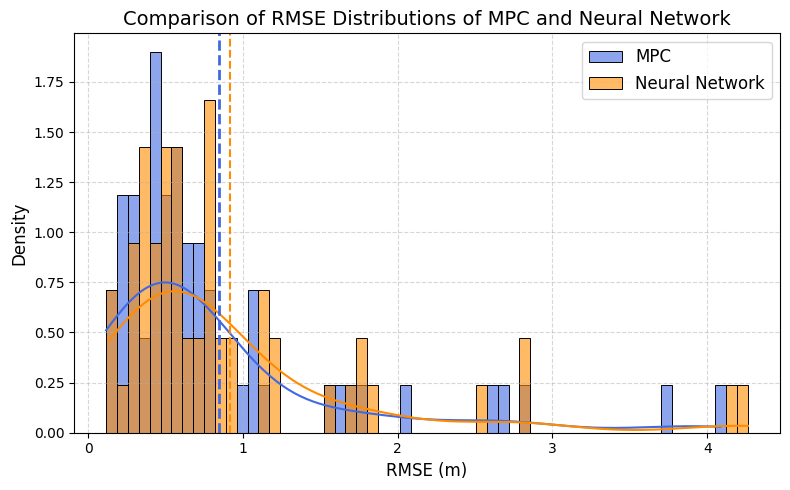

In [2]:
path = '../../training_results/Training dataset v1 - octorotor/'
#c.plot_rmse_histogram('training_results\Training dataset v0 - octorotor/')
analyzer.plot_histogram(path, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','Comparison of RMSE Distributions of MPC and Neural Network', ['MPC', 'Neural Network'])
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


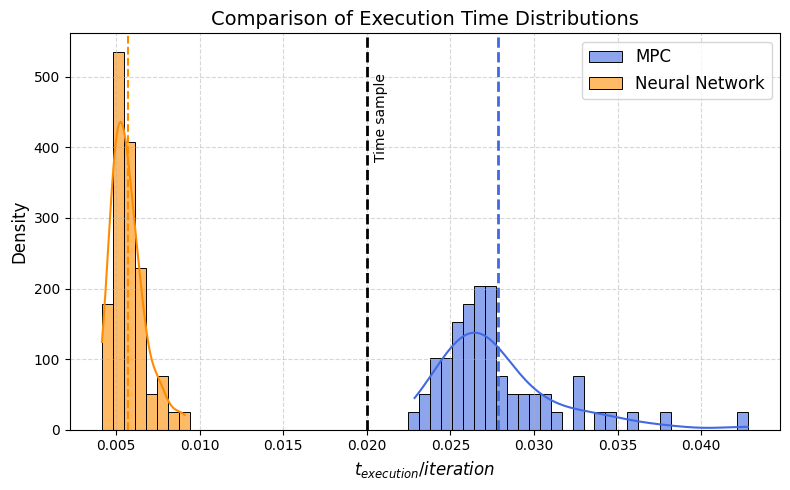

In [3]:
analyzer.plot_histogram(path, 'mpc_execution_time (s)', 'nn_execution_time (s)', '$t_{execution}/iteration$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations')
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [4]:
stats_rmse = analyzer.stats_simulations(path, 'mpc_RMSe', 'nn_RMSe')
stats_rmse



,Controller,min,max,mean,std
0,MPC,0.116403,4.084736,0.845388,0.837089
1,Neural Network,0.131265,4.262577,0.916501,0.863340


In [5]:
stats_execution_time = analyzer.stats_simulations(path, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.022854,0.042777,0.027855,0.003695
1,Neural Network,0.004155,0.009104,0.005706,0.001014


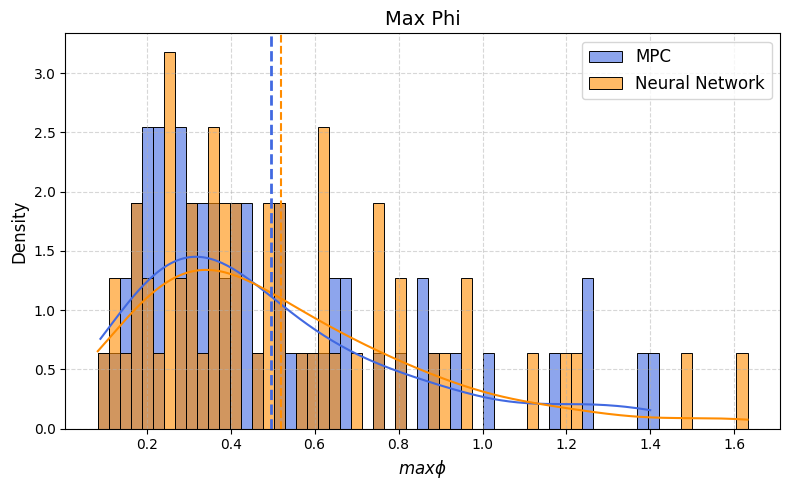

In [6]:
analyzer.plot_histogram(path, 'mpc_max_phi (rad)', 'nn_max_phi', '$max \\phi$', 'Max Phi', ['MPC', 'Neural Network'])

In [7]:
df = pd.read_csv(path + 'dataset_metadata.csv', sep=',')

In [8]:
df[df['nn_max_phi'] > 1][['sim_id', 'trajectory_type', 'nn_max_phi']]

,sim_id,trajectory_type,nn_max_phi
2,3,circle_xy,1.214220
3,4,circle_xy,1.631134
6,7,circle_xy,1.115638
7,8,circle_xy,1.499766
11,12,circle_xy,1.195993


In [9]:
stats_max_phi = analyzer.stats_simulations(path, 'mpc_max_phi (rad)', 'nn_max_phi')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,0.089980,1.399345,0.495600,0.327277
1,Neural Network,0.083642,1.631134,0.520959,0.337242


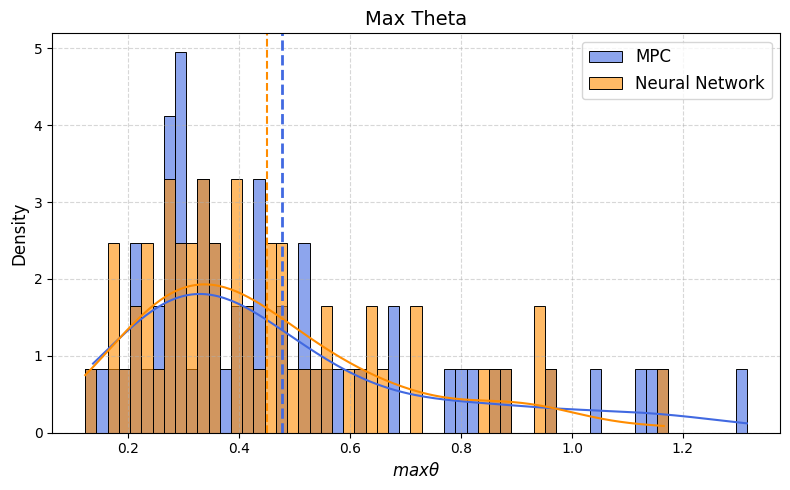

In [10]:
analyzer.plot_histogram(path, 'mpc_max_theta (rad)', 'nn_max_theta', '$max \\theta$', 'Max Theta', ['MPC', 'Neural Network'])

In [11]:
df[df['mpc_success'] == False]

,sim_id,trajectory_type,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,...,nn_mean_phi,nn_std_phi,nn_min_theta,nn_max_theta,nn_mean_theta,nn_std_theta,nn_min_psi,nn_max_psi,nn_mean_psi,nn_std_psi


In [12]:
df[(df['sim_id'] == 30) & (df['trajectory_type'] == 'circle_xy')][['mpc_RMSe', 'nn_RMSe']]

,mpc_RMSe,nn_RMSe
29,0.409042,0.409132


In [13]:
df_performance = pd.read_csv('../../training_results/performance_analysis_temp/dataset_metadata.csv', sep=',')

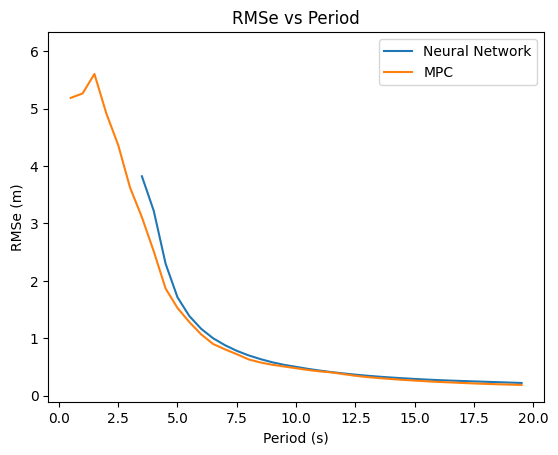

In [14]:
x = df_performance['period (s)']
y1 = df_performance['nn_RMSe']
y2 = df_performance['mpc_RMSe']

fig = plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('Period (s)')
plt.ylabel('RMSe (m)')
plt.title('RMSe vs Period')
plt.legend(['Neural Network', 'MPC'])

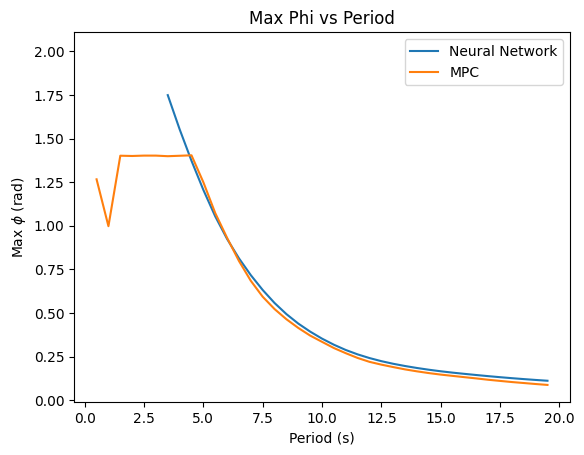

In [15]:
x = df_performance['period (s)']
y1 = df_performance['nn_max_phi']
y2 = df_performance['mpc_max_phi (rad)']

fig = plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('Period (s)')
plt.ylabel('Max $\\phi$ (rad)')
plt.title('Max Phi vs Period')
plt.legend(['Neural Network', 'MPC'])

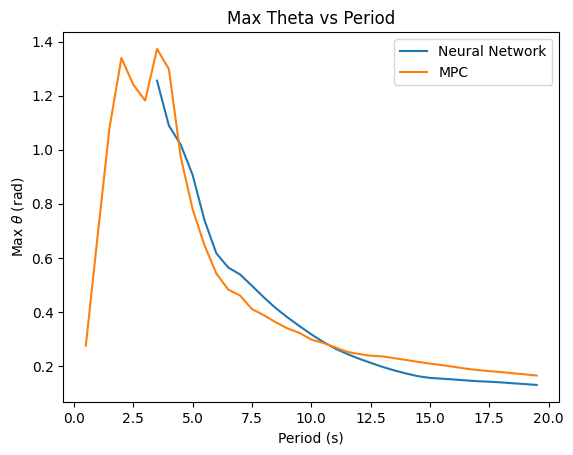

In [16]:
x = df_performance['period (s)']
y1 = df_performance['nn_max_theta']
y2 = df_performance['mpc_max_theta (rad)']

fig = plt.figure()
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('Period (s)')
plt.ylabel('Max $\\theta$ (rad)')
plt.title('Max Theta vs Period')
plt.legend(['Neural Network', 'MPC'])

x75
 0.167356785187537


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\..\plots.py:413: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


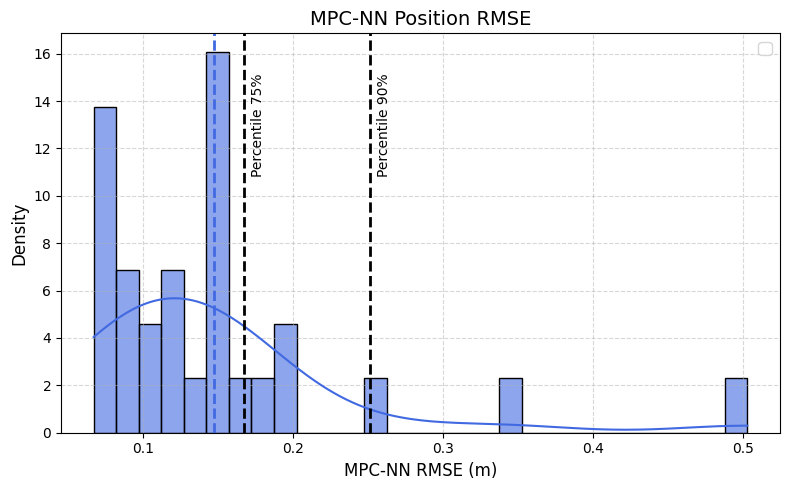

In [17]:
# MPC-NN Position RMSE
df2 = pd.read_csv('../../training_results/test_control_rmse/dataset_metadata.csv', sep=',')

df2 = df2[(df2['mpc_success'] == True) & (df2['nn_success'] == True) & (df2['nn_RMSe'] < 1.5)]

analyzer.plot_histogram_temp('../../training_results/test_control_rmse/', 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE')

C:\Users\mathe\AppData\Local\Temp\ipykernel_22284\145501362.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df2[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


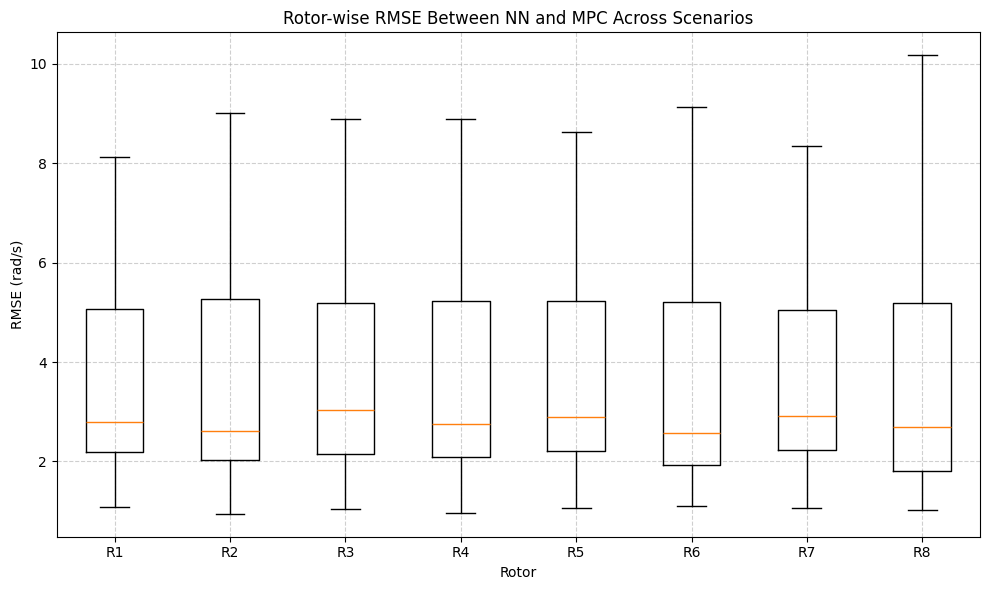

In [18]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df2[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()